# The Effect of Salinization on Medicago Accessions

This project is devoted to the Srlk-gene nucleotide polymorphism analysis. Previously (in the PhD thesis) perennial Medicago accessions were taken in the sequencing experiments and were simultaneously evaluated for salt tolerance in a greenhouse. 

The data is imported as `df` and contains revealed nucleotide polymorphism of the Srlk-gene, root, stem length, and vitality of the plants.

In the thesis, the data were analyzed with Statistica™. Here we re-study the data with the sklearn python library.

In addition to the principal component analysis, we incorporate Random Forest Classifier to predict the ability of Medicago plants to survive under salt stress (`Vitality` feature) and identification important alleles.

## Groundwork
Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Import data 

In [2]:
df = pd.read_excel('DB/Srlk_for_python2.xls', sheet_name='Лист3', header = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Accession    132 non-null    object 
 1   Var          132 non-null    int64  
 2   Vitality     132 non-null    int64  
 3   Root length  132 non-null    float64
 4   Stem length  132 non-null    float64
 5   113_aa       132 non-null    int64  
 6   113_ag       132 non-null    int64  
 7   113_gg       132 non-null    int64  
 8   188_tt       132 non-null    int64  
 9   188_ct       132 non-null    int64  
 10  195_at       132 non-null    int64  
 11  195_aa       132 non-null    int64  
 12  244_aa       132 non-null    int64  
 13  244_ag       132 non-null    int64  
 14  244_gg       132 non-null    int64  
 15  245_gg       132 non-null    int64  
 16  245_ag       132 non-null    int64  
 17  245_aa       132 non-null    int64  
 18  390_aa       132 non-null    int64  
 19  390_ag  

## 1 Principal Component analysis

### 1.1 Selecting features (X) for further PCA

In [4]:
X = pd.get_dummies(df.iloc[:,2:41])
X

,Vitality,Root length,Stem length,113_aa,113_ag,113_gg,188_tt,188_ct,195_at,195_aa,...,577_aa,726_tt,726_at,726_aa,753_gg,753_ag,753_aa,804_tt,804_tc,804_cc
0,1,10.0,10.0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,1,0,0
1,1,9.0,13.0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
2,1,9.0,10.0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
3,1,22.0,19.0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
4,1,24.0,21.0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0,17.0,7.0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
128,0,3.0,13.0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
129,0,4.0,7.0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
130,0,5.5,9.5,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0


### 1.2 Standartisation of X 

In [5]:
X_std = StandardScaler().fit_transform(X)

### 1.3 The number of components selection

<function matplotlib.pyplot.show(close=None, block=None)>

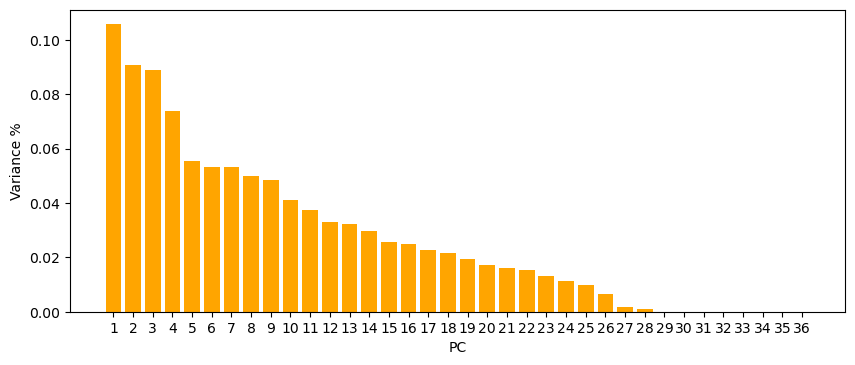

In [6]:
# Count and visualize the explained variance ratio 
pca = PCA(n_components=36)
pca.fit_transform(X_std)
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':100})
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='orange')
plt.xlabel('PC')
plt.ylabel('Variance %')
plt.xticks(PC)
plt.show

 We took the first 5 components (50% of explained variance).

### 1.4 PCA run

In [7]:
pca = PCA(n_components=5)
model = pca.fit_transform(X_std)

In [8]:
print(pca.explained_variance_ratio_) # Explained variance

[0.10583047 0.09071638 0.0888062  0.07396618 0.05551648]


In [9]:
# Add principal components to df
df['PCA1'] = model[:,0]
df['PCA2'] = model[:,1]
df['PCA3'] = model[:,2]
df['PCA4'] = model[:,3]
df['PCA5'] = model[:,4]

# Add column 'Category' - string version of 'Vitality'
df['Category'] = df['Vitality'].replace((1, 0), ('survived', 'faded'))

### 1.5 The Medicago plants in the system of components

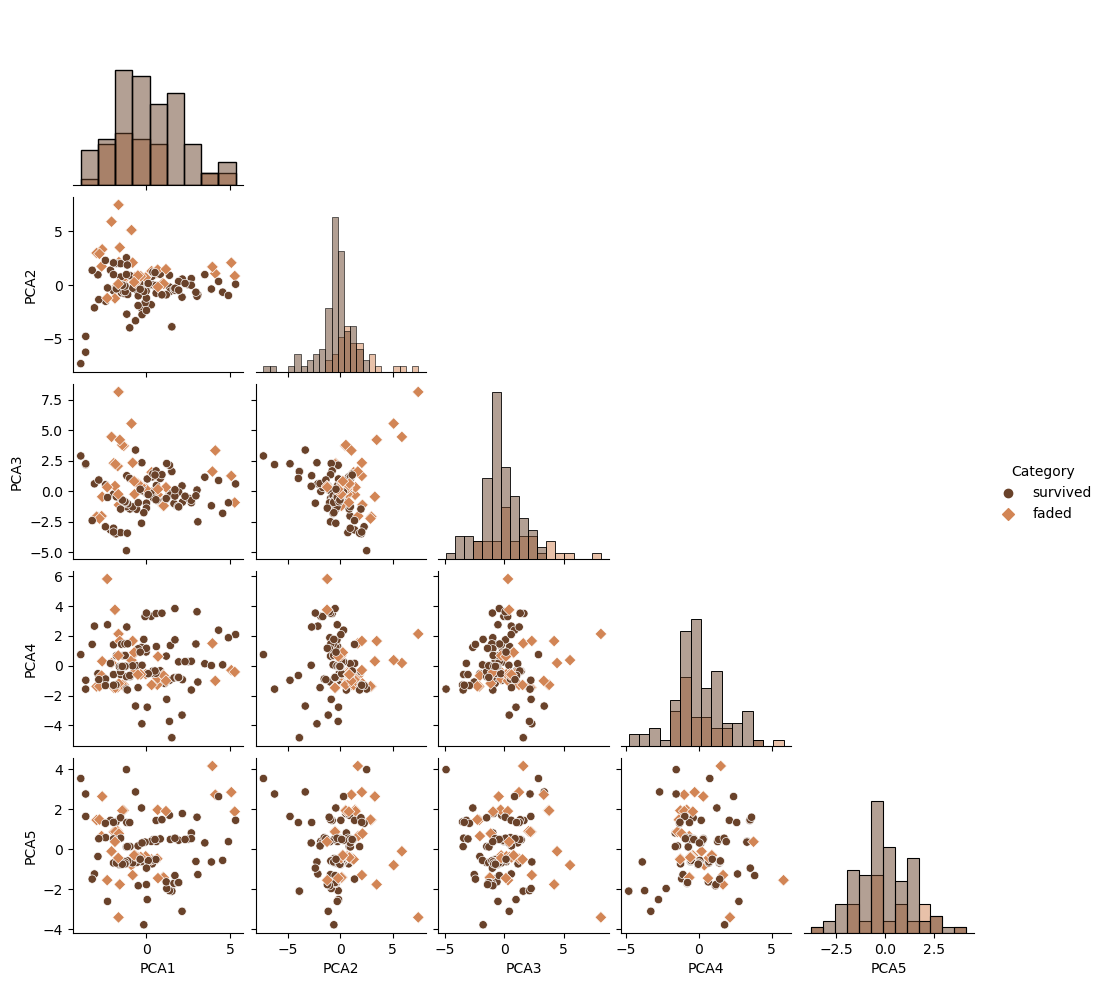

In [10]:
# Studied plants in the system of Principal Components, based on categories: 'survived' and 'faded'
sns.pairplot(df.iloc[:,41:47], hue='Category', palette='copper', diag_kind='hist', 
             markers=['o', 'D'], corner=True, height=2)

In [11]:
# Table of alleles and their PCA loadings
alleles_pca = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), 
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], 
                            index = df.iloc[:,2:41].columns).round(3)
alleles_pca

,PC1,PC2,PC3,PC4,PC5
Vitality,0.109,-0.448,-0.364,0.014,-0.144
Root length,0.460,-0.229,-0.357,0.005,0.030
Stem length,0.483,-0.159,-0.430,0.045,0.048
113_aa,-0.339,-0.185,0.064,0.097,-0.483
113_ag,-0.045,0.070,-0.251,-0.012,0.256
113_gg,0.394,0.169,0.052,-0.100,0.406
188_tt,-0.696,-0.034,-0.017,-0.235,-0.262
188_ct,0.696,0.034,0.017,0.235,0.262
195_at,-0.361,-0.398,0.398,-0.219,0.287
195_aa,0.361,0.398,-0.398,0.219,-0.287


Hence, the results obtained with the sklearn python library are concordant with PhD thesis results. 

## 2 Analysis with Random Forest Classifier

### 2.1 Split df to X_drop (exclude 'Vitality'), and y ('Vitality')

In [12]:
X_drop = df.iloc[:,3:41]
X_drop = pd.get_dummies(X_drop)
X_drop

,Root length,Stem length,113_aa,113_ag,113_gg,188_tt,188_ct,195_at,195_aa,244_aa,...,577_aa,726_tt,726_at,726_aa,753_gg,753_ag,753_aa,804_tt,804_tc,804_cc
0,10.0,10.0,1,0,0,1,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
1,9.0,13.0,0,0,1,1,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0
2,9.0,10.0,1,0,0,1,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0
3,22.0,19.0,1,0,0,1,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0
4,24.0,21.0,0,0,1,1,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,17.0,7.0,1,0,0,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
128,3.0,13.0,1,0,0,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
129,4.0,7.0,1,0,0,1,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0
130,5.5,9.5,1,0,0,1,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0


In [13]:
y = df.iloc[:,2]

### 2.2 Split our data to train and test sets 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.25, random_state=42, stratify=y)
y_train = np.array(y_train)
y_test = np.array(y_test)

### 2.3 Standartisation of data

In [15]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### 2.4 Random Forest Classifier run

In [16]:
forest = RandomForestClassifier(n_estimators=100, random_state=15, bootstrap=False)

In [17]:
# Fit the train model
forest.fit(X_train_std, y_train)
display(forest.score(X_train_std, y_train))

0.98989898989899

In [18]:
# Predict the test set
test_predictions = forest.predict(X_test_std)
accuracy = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}%".format(accuracy))

Accuracy with RandomForest: 87.878788%


<AxesSubplot:>

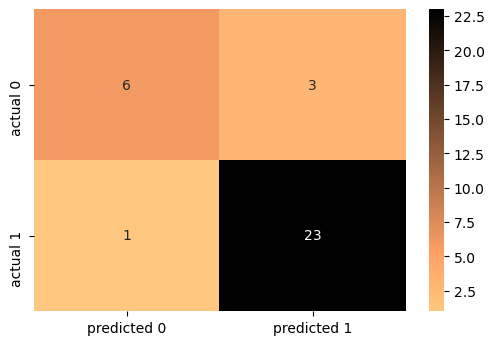

In [19]:
# The confusion matrix shows prediction results
y_pred = forest.predict(X_test_std)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':100})
display(sns.heatmap(conf_matrix, annot=True, cmap='copper_r'))

### 2.5 Feature importances

In [20]:
# Features and its importances estimated with Random Forest Classifier
feature_imp = pd.Series(forest.feature_importances_,index=X_drop.columns).sort_values(ascending=False)
feature_imp

Root length    0.294248
Stem length    0.230161
753_gg         0.051814
113_gg         0.036329
753_aa         0.032235
113_aa         0.025836
544_cc         0.020989
544_gc         0.020517
726_at         0.018881
195_at         0.017867
577_ag         0.017867
390_ag         0.017703
577_gg         0.017172
726_aa         0.015927
390_aa         0.014711
195_aa         0.013995
753_ag         0.013795
245_ag         0.013344
480_gc         0.012932
483_tc         0.012437
245_gg         0.012088
480_cc         0.011133
483_tt         0.010830
188_ct         0.010687
188_tt         0.010641
244_aa         0.007981
244_ag         0.007759
483_cc         0.006331
804_tt         0.005453
726_tt         0.005208
804_tc         0.003462
390_gg         0.003355
804_cc         0.002578
577_aa         0.001727
245_aa         0.001118
113_ag         0.000687
244_gg         0.000205
480_gg         0.000000
dtype: float64

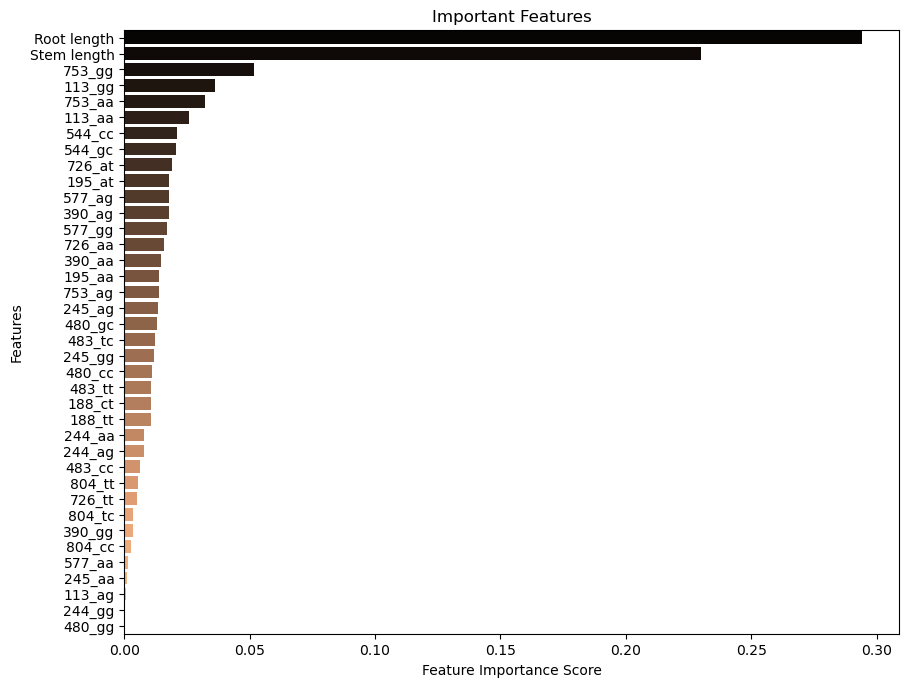

In [21]:
# Bar plot of features and its importances estimated with Random Forest Classifier
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.barplot(x=feature_imp, y=feature_imp.index, palette='copper')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show()

In [22]:
# Create DataFrame of features and its importances estimated with Random Forest Classifier 
alleles_forest = pd.DataFrame(forest.feature_importances_,
                              index=X_drop.columns, columns = ['Forest']).round(3)

### 2.6 Feature selection

In [23]:
# One more way to find out important features with SelectFromModel module 
sel = SelectFromModel(forest, threshold='median')
sel.fit(X_drop, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=False,
                                                 random_state=15),
                threshold='median')

In [24]:
# Features which importance is more than median are shown as 'True'
sel.get_support()

array([ True,  True,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False])

In [25]:
# The number of features which importance is more than the median are shown as 'True'
selected_features = X_drop.columns[(sel.get_support())]
len(selected_features)

19

In [26]:
# The number of features which importance is more than the median
print(selected_features)

Index(['Root length', 'Stem length', '113_aa', '113_gg', '188_tt', '188_ct',
       '390_ag', '480_gc', '483_tc', '544_gc', '544_cc', '577_gg', '577_ag',
       '726_tt', '726_at', '726_aa', '753_gg', '753_ag', '753_aa'],
      dtype='object')


In [27]:
# The median value
sel.threshold_

0.012951903766121983

In [28]:
# Create DataFrame with features which importance is more than the median value
sel_median = [0.13]*19
selected_features = pd.DataFrame(sel_median, columns=['Sel_forest'])
selected_features.index = ['Root length', 
                           'Stem length', 
                           '113_aa', 
                           '113_gg', 
                           '188_tt', 
                           '188_ct', 
                           '390_ag', 
                           '480_gc', 
                           '483_tc', 
                           '544_gc', 
                           '544_cc', 
                           '577_ag', 
                           '577_gg', 
                           '726_tt', 
                           '726_at', 
                           '726_aa', 
                           '753_gg', 
                           '753_ag', 
                           '753_aa']

Thus, important features got by SelectFromModel are: 
'Root length', 'Stem length', '113_aa', '113_gg', **'188_tt'**, **'188_ct'**, '390_ag', '480_gc', **'483_tc'**, '544_gc', '544_cc', '577_ag', '577_gg', **'726_tt'**, '726_at', '726_aa', '753_gg', '753_ag', '753_aa'. 

Feature importances are more than 0.01295.

Features selected by feature importances from X_drop_forest data: 
'Root length', 'Stem length', '753_gg', '113_gg ', '753_aa', '113_aa', '544_cc', '544_gc', '726_at', **'195_at'**, '577_ag', '390_ag', '577_gg', '726_aa', **'390_aa'**, **'195_aa'**, '753_ag', **'245_ag'**, '480_gc'.

Accuracy prediction with RandomForest is 87.878788%.

Alleles marked as bold are different.

## 3 SparsePCA and Random Forest Classifier run

### 3.1 Use data from 2.2, 2.3

### 3.2 Instantiate of dimensional reduction technic and classifier

In [29]:
spca_p = SparsePCA(n_components=5, random_state=18, alpha=0.5)
forest_p = RandomForestClassifier(n_estimators=100, random_state=15, bootstrap=False)

### 3.3 Make Pipeline

In [30]:
'''
First, we make a dimensional reduction with Sparse PCA, 
then predict survived and faded plants with Random Forest Classifier
'''
pipe = Pipeline(steps=[
        ('spca_p', spca_p),
        ('forest_p', forest_p)
        ])

In [31]:
# Fit the model
pipe = pipe.fit(X_train_std, y_train)

In [32]:
# Predict the train set 
train_predictions = pipe.predict(X_train_std)
accuracy = accuracy_score(train_predictions, y_train) * 100
print("Accuracy with RandomForest: {0:.6f}%".format(accuracy))

Accuracy with RandomForest: 98.989899%


In [33]:
# Predict the test set
test_predictions = pipe.predict(X_test_std)
accuracy = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}%".format(accuracy))

Accuracy with RandomForest: 63.636364%


Accuracy with RandomForest is 63.6363%.

It is about 9% less than with Random Forest classifier without SparsePCA (87,88%).

Let's tune the model.

In [34]:
# Set parameters we want to estimate with GridSearchCV
param_dict = {'spca_p__n_components':[5, 10],
              'spca_p__alpha':[0.5, 0.8],
              'forest_p__n_estimators':[200, 300]}

estimator = GridSearchCV(pipe,
                         param_dict,
                         verbose=1, cv=3)

In [35]:
# Fit the estimator
estimator.fit(X_train_std, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  4.3min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('spca_p',
                                        SparsePCA(alpha=0.5, n_components=5,
                                                  random_state=18)),
                                       ('forest_p',
                                        RandomForestClassifier(bootstrap=False,
                                                               random_state=15))]),
             param_grid={'forest_p__n_estimators': [200, 300],
                         'spca_p__alpha': [0.5, 0.8],
                         'spca_p__n_components': [5, 10]},
             verbose=1)

In [36]:
# Print estimated best parameters
print("The best parameters: {0}".format(estimator.best_params_))

The best parameters: {'forest_p__n_estimators': 200, 'spca_p__alpha': 0.8, 'spca_p__n_components': 10}


In [37]:
# Set new parameters
pipe.set_params(**estimator.best_params_)

Pipeline(steps=[('spca_p',
                 SparsePCA(alpha=0.8, n_components=10, random_state=18)),
                ('forest_p',
                 RandomForestClassifier(bootstrap=False, n_estimators=200,
                                        random_state=15))])

### 3.4 Random Forest run again with estimated parameters

In [38]:
# Fit the model
pipe.fit(X_train_std, y_train)

Pipeline(steps=[('spca_p',
                 SparsePCA(alpha=0.8, n_components=10, random_state=18)),
                ('forest_p',
                 RandomForestClassifier(bootstrap=False, n_estimators=200,
                                        random_state=15))])

In [39]:
# Predict the train set
train_predictions = pipe.predict(X_train_std)
accuracy = accuracy_score(train_predictions, y_train) * 100
print("Accuracy with RandomForest: {0:.6f}%".format(accuracy))

Accuracy with RandomForest: 98.989899%


In [40]:
# Predict the test set
test_predictions = pipe.predict(X_test_std)
accuracy = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}%".format(accuracy))

Accuracy with RandomForest: 84.848485%


New Accuracy with RandomForest is 84.848485%. 

### 3.5 Alleles that contribute to the decision making

In [41]:
# Create DataFrame with SPCA
components = pd.DataFrame(spca_p.components_.T, 
                          columns=['SPC1', 
                                   'SPC2', 
                                   'SPC3', 
                                   'SPC4', 
                                   'SPC5', 
                                   'SPC6', 
                                   'SPC7', 
                                   'SPC8', 
                                   'SPC9', 
                                   'SPC10'], 
                          index=X_drop.columns)
components

,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10
Root length,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.681516
Stem length,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.693347
113_aa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.699051,0.000000
113_ag,-0.125940,0.000000,0.000000,-0.017542,0.000000,0.000000,0.000000,-0.002919,0.180323,-0.153627
113_gg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.657225,0.000000
188_tt,-0.529039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.129019,0.000000
188_ct,0.529039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129019,0.000000
195_at,0.000000,0.000000,-0.502569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041184
195_aa,0.000000,0.000000,0.502569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.041184
244_aa,0.000000,0.000000,0.435804,0.000000,0.000000,0.000000,-0.223716,0.000000,0.000000,0.084082


In [42]:
# Feature importances estimated with Random Forest Classifier on new features set (Sparse Principal Components)
feature_imp = pd.Series(forest_p.feature_importances_,
                        index=components.iloc[:,0:10].columns).sort_values(ascending=False)
feature_imp

SPC10    0.251073
SPC9     0.155416
SPC2     0.130042
SPC7     0.076471
SPC6     0.073829
SPC8     0.071152
SPC4     0.069951
SPC3     0.064154
SPC1     0.059710
SPC5     0.048201
dtype: float64

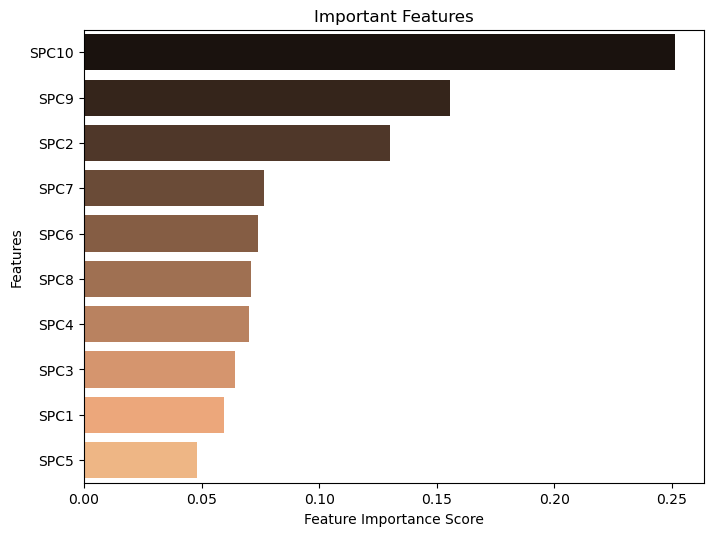

In [43]:
'''
Bar plot of feature importances estimated with Random Forest Classifier 
on new features set (Sparse Principal Components)
'''
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
sns.barplot(x=feature_imp, y=feature_imp.index, palette='copper')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show()

Features SPC2, SPC9, SPC10 have importaces more than 10%. 


## Tables of important features

### Table 1
We concatenate all alleles and their loadings, gotten with PCA, SPCA and Random Forest ('outer' join). To show which alleles are supposed to be important in the context of the salt stress resistance we take the absolute values of loadings as a sign of the loading is arbitrary. Then we sort alleles 'SPC8', 'SPC7', 'Forest', 'PC1' features.

In [46]:
# Join tables together
alleles_all_outer = pd.concat([alleles_pca, 
                               components.round(3), 
                               alleles_forest.round(3), 
                               selected_features], 
                              join='outer', axis=1) 

# Get absolute values
alleles_all_abs = abs(alleles_all_outer)

# Sort alleles by their importances
sorted_abs = alleles_all_abs.sort_values(by = ['SPC8', 'SPC10', 'Forest', 'PC1'], 
                                         ascending=[False, False, False, False])
                                                                
# Show alleles without 0
sorted_abs = sorted_abs[sorted_abs.iloc[:,0:17] != 0].fillna(' ')
sorted_abs

,PC1,PC2,PC3,PC4,PC5,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,Forest,Sel_forest
480_gc,0.506,0.148,0.177,0.078,0.342,,,,,,,,0.698,,,0.013,0.13
480_cc,0.548,0.145,0.211,0.117,0.353,,,,,,,,0.698,,,0.011,
726_tt,0.077,0.046,0.179,0.231,0.155,,,0.031,0.023,,,0.216,0.136,,,0.005,0.13
726_aa,0.195,0.345,0.556,0.002,0.239,0.167,0.353,,,,,0.087,0.082,,,0.016,0.13
577_aa,0.353,0.048,0.014,0.271,0.172,0.359,,,,,,,0.009,0.094,0.084,0.002,
726_at,0.172,0.352,0.512,0.121,0.344,0.172,0.383,,,,,,0.004,0.019,,0.019,0.13
113_ag,0.045,0.070,0.251,0.012,0.256,0.126,,,0.018,,,,0.003,0.18,0.154,0.001,
244_ag,0.158,0.572,0.272,0.305,0.164,,,0.455,,,,0.238,0.001,,0.049,0.008,
Stem length,0.483,0.159,0.430,0.045,0.048,,,,,,,,,,0.693,0.23,0.13
Root length,0.460,0.229,0.357,0.005,0.030,,,,,,,,,,0.682,0.294,0.13


### Table 2
We show alleles selected with PCA, SPCA, and Random Forest simultaneously ('inner' join).  

In [47]:
# Join tables together and get interceptin
alleles_all_inner = pd.concat([alleles_pca, 
                               components.round(3), 
                               alleles_forest.round(3), 
                               selected_features], 
                              join='inner', axis=1) 

# Get absolute values
alleles_inner_abs = abs(alleles_all_inner)

# Sort alleles by their importances
sorted_inner_abs = alleles_inner_abs.sort_values(by = ['SPC8', 'SPC10', 'Forest', 'PC1'], 
                                         ascending=[False, False, False, False])
                                                                
# Show alleles without 0
sorted_inner_abs = sorted_inner_abs[sorted_inner_abs.iloc[:,0:17] != 0].fillna(' ')
sorted_inner_abs

,PC1,PC2,PC3,PC4,PC5,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,Forest,Sel_forest
480_gc,0.506,0.148,0.177,0.078,0.342,,,,,,,,0.698,,,0.013,0.13
726_tt,0.077,0.046,0.179,0.231,0.155,,,0.031,0.023,,,0.216,0.136,,,0.005,0.13
726_aa,0.195,0.345,0.556,0.002,0.239,0.167,0.353,,,,,0.087,0.082,,,0.016,0.13
726_at,0.172,0.352,0.512,0.121,0.344,0.172,0.383,,,,,,0.004,0.019,,0.019,0.13
Stem length,0.483,0.159,0.430,0.045,0.048,,,,,,,,,,0.693,0.230,0.13
Root length,0.460,0.229,0.357,0.005,0.030,,,,,,,,,,0.682,0.294,0.13
577_gg,0.142,0.287,0.102,0.601,0.217,0.186,,,0.454,,,,,0.066,0.017,0.017,0.13
753_gg,0.519,0.270,0.226,0.274,0.126,0.321,0.073,,0.098,,0.181,0.053,,,,0.052,0.13
113_gg,0.394,0.169,0.052,0.100,0.406,,,,,,,,,0.657,,0.036,0.13
753_aa,0.635,0.015,0.434,0.126,0.036,0.317,0.009,,0.07,0.238,0.091,0.068,,,,0.032,0.13


## Conclusion
Medicago plants ability to survive under salinity (besides root and stem length) could be associated with the following alleles: '113_aa', '113_gg', '188_tt', '188_ct', '390_ag', '480_gc', '483_tc', '544_gc', '544_cc', '577_ag', '577_gg', '726_tt', '726_at', '726_aa', '753_gg', '753_ag', '753_aa'. 